# 1. Setup and Creating the Dataset
 importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Creating the dataset

In [28]:
# generating a simulated dataset using scikit-learn
features, targets = make_classification(
    n_samples = 40,
    n_features = 2,
    n_informative = 1,
    n_redundant= 0,
    n_clusters_per_class = 1,
    random_state = 1
)

 putting the data into a pandas DataFrame to see what it looks like.

In [29]:
df=pd.DataFrame(data=features,columns=["x1", "x2"])
df["targets"] = targets
df.head()

,x1,x2,targets
0,0.885141,-0.301812,0
1,0.586623,-0.694550,0
2,-0.222328,0.714700,1
3,-0.208894,-0.743572,0
4,1.131629,0.845154,1


checking the `shape` of our data.

In [30]:
# checking the shape of our data

df.shape

(40, 3)

In [31]:
features.shape

(40, 2)

In [32]:
targets.shape

(40,)

`np.bincount` is a quick way to count how many samples of each class we have.

In [33]:
np.bincount(targets)

array([20, 20])

## Visualizing the dataset



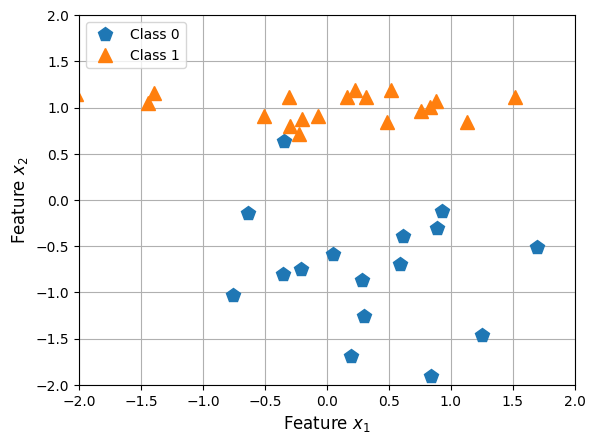

In [34]:
plt.plot(features[targets==0,0], features[targets==0, 1], marker="p", markersize=10, linestyle="", label = "Class 0") 
plt.plot(features[targets == 1, 0], features[targets ==1, 1], marker="^", markersize=10, linestyle="", label="Class 1")
plt.legend(loc=2)
plt.xlim(-2,2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

##  Implementing a Perceptron

In [35]:
# defining class perceptron
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range (num_features)]
        self.bias= 0.0
        
     

In [36]:
# creating an instance of the perceptron class
ppn = Perceptron(num_features = 2)

# checking the weight of the pereptron instance
ppn.weights


[0.0, 0.0]

In [37]:
# checking the bias of the pereptron instance
ppn.bias   

0.0

## Implementing the forward function



In [38]:
class Perceptron:
    def __init__ (self,num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0
        
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i] 
        
        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0 
            
        return prediction
    
          
ppn = Perceptron(num_features = 2) #reinitializing with 2 features
x= [1.23, 2.13]
ppn.forward(x)              

0

The prediction in the above case is 0 because the weights and bias of the perceptron are still 0. It has not learned anything yet.

## Updating the weights (The Learning Rule)


In [ ]:
class Perceptron:
    def __init__ (self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0
    
    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
            
        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0
            
        return prediction   
    
ppn = Perceptron(num_features = 3)
x=[1.1, 2.1]
ppn.forward(x, y_true = 1)   

##  Training the model



In [40]:
def train(model, X_train, y_train, epochs):
    # training loop
    for epoch in range(epochs):
        error_count = 0
        
        for x, y in zip(X_train, y_train):
            error = model.forward(x,y)
            error_count += abs(error)
            
            
        print(f"Epoch {epoch + 1} errors: {error_count}")   

In [ ]:
ppn = Perceptron(num_features = 3)
train(ppn, features, targets, epochs = 5)

## Evaluating the model

In [ ]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [ ]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy", train_acc)

## Plotting the Decision Boundary

In [ ]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias
    #  z = w1*x1 = w2*x2 + b =0
    # => x2 =(-w1*x1 -b) /w2
    
    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2
    
    x1_max = 20
    x2_max = (-(w1 * x1_max) - b)/w2
    
    return x1_min, x1_max, x2_min, x2_max

In [ ]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(features[targets == 0, 0], features[targets == 0,1], marker="D", markersize = 10, linestyle="", label="Class 0")

plt.plot(features[targets== 1,0], features[targets == 1, 1], marker = "^", markersize=10, linestyle="", label="Class 1")

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)
plt.grid()
plt.show()